In [ ]:
import pandas as pd
from sklearn import preprocessing
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_dataset.csv', sep = ',')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [ ]:
id = df.ID
df = df.drop('ID', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


# Заполнение пропусков

In [ ]:
keys = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']
for i in keys: 
  print(df[i].value_counts(), '\n')

Male      4417
Female    3651
Name: Gender, dtype: int64 

Yes    4643
No     3285
Name: Ever_Married, dtype: int64 

Yes    4968
No     3022
Name: Graduated, dtype: int64 

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64 

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64 

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64 

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64 

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64 



У Ever_Married кол-во значений Yes и No практически равновесно, поэтому выберем другой способ заполнения, отличный от моды. У Graduated, Profession,  Work_Experience такая же ситуация. В Family_Size и Var_1 используем моду.

In [ ]:
df.Ever_Married = df.Ever_Married.fillna(method = 'bfill')
df.Graduated = df.Graduated.fillna(method = 'ffill')
df.Profession = df.Profession.fillna(method = 'bfill')
df.Work_Experience = df.Work_Experience.fillna(method = 'ffill')
df.Family_Size = df.Family_Size.fillna(df.Family_Size.mode()[0])
df.Var_1 = df.Var_1.fillna(df.Var_1.mode()[0])

In [ ]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

# Работа с категориальными данными

In [ ]:
s = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(s)

s = {'Yes': 1, 'No': 0}
df['Ever_Married'] = df['Ever_Married'].map(s)
df['Graduated'] = df['Graduated'].map(s)

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Profession']) 
df['Profession'] = label_encoder.transform(df['Profession'])

label_encoder1 = preprocessing.LabelEncoder() 
label_encoder1.fit(df['Var_1']) 
df['Var_1'] = label_encoder1.transform(df['Var_1'])

label_encoder2 = preprocessing.LabelEncoder() 
label_encoder2.fit(df['Spending_Score']) 
df['Spending_Score'] = label_encoder2.transform(df['Spending_Score'])

df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,0.0,1,6.0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   int64  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int64  
 4   Profession       8068 non-null   int64  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 567.4 KB


# Матрица корреляции

Увидим сильно коррелирующие признаки - age и ever_married, ever_married и spending_score. Признак ever_married удалим.

<Axes: >

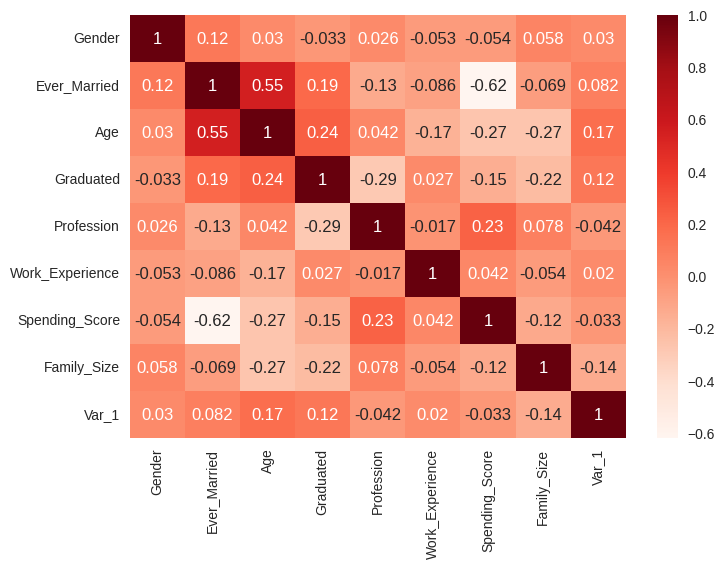

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = "Reds")

In [ ]:
df = df.drop(['Ever_Married'], axis = 1)

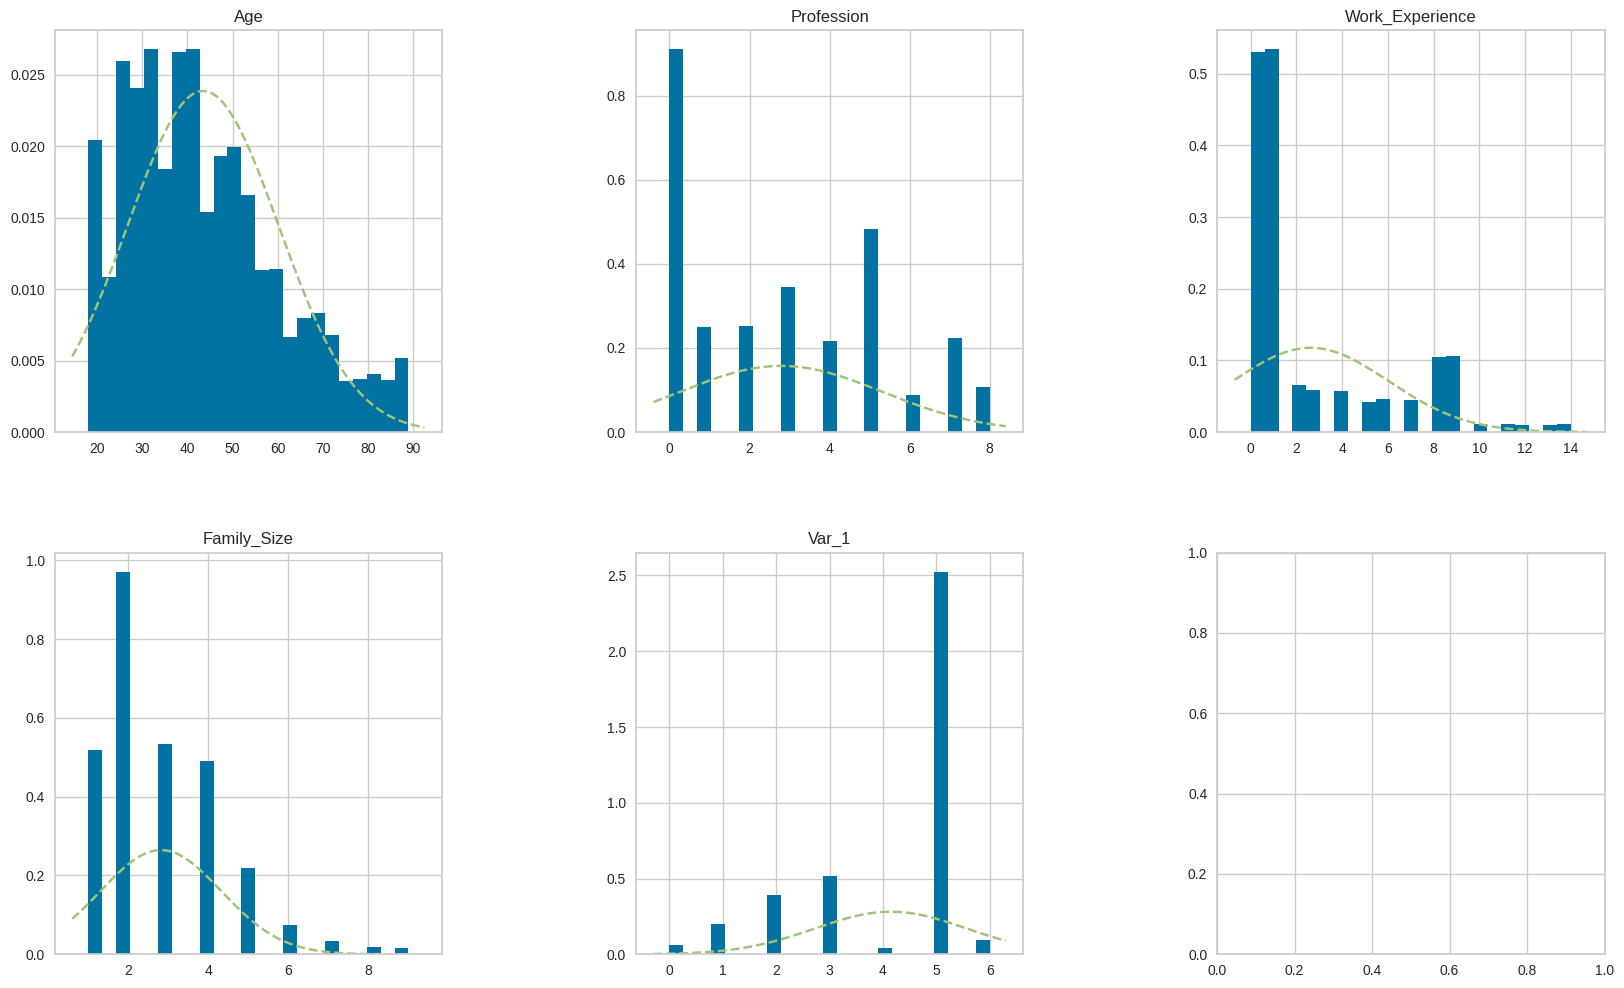

In [ ]:
from scipy import stats
import numpy as np
keys = ['Age', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']

fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
fig.set_size_inches(20, 12)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

In [ ]:
df = df.drop(['Var_1', 'Work_Experience'], axis = 1)

# Масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()

X_std = std.fit_transform(df)

X_std = pd.DataFrame(X_std, columns = df.columns)
X_std

,Gender,Age,Graduated,Profession,Spending_Score,Family_Size
0,0.909164,-1.284623,-1.283686,0.870835,0.754462,0.785536
1,-1.099912,-0.327151,0.779007,-0.311379,-1.603013,0.122735
2,-1.099912,1.408268,0.779007,-0.311379,0.754462,-1.202868
3,0.909164,1.408268,0.779007,1.658977,-0.424275,-0.540066
4,-1.099912,-0.207467,0.779007,0.082692,-0.424275,2.111139
...,...,...,...,...,...,...
8063,0.909164,-1.284623,-1.283686,0.476763,0.754462,2.773940
8064,0.909164,-0.506677,-1.283686,0.476763,0.754462,0.785536
8065,-1.099912,-0.626361,0.779007,0.870835,0.754462,-1.202868
8066,-1.099912,-0.985413,0.779007,0.870835,0.754462,0.785536


In [ ]:
mmsc = MinMaxScaler()

X_norm = mmsc.fit_transform(df)

X_norm = pd.DataFrame(X_norm, columns = df.columns)

X_norm

,Gender,Age,Graduated,Profession,Spending_Score,Family_Size
0,1.0,0.056338,0.0,0.625,1.0,0.375
1,0.0,0.281690,1.0,0.250,0.0,0.250
2,0.0,0.690141,1.0,0.250,1.0,0.000
3,1.0,0.690141,1.0,0.875,0.5,0.125
4,0.0,0.309859,1.0,0.375,0.5,0.625
...,...,...,...,...,...,...
8063,1.0,0.056338,0.0,0.500,1.0,0.750
8064,1.0,0.239437,0.0,0.500,1.0,0.375
8065,0.0,0.211268,1.0,0.625,1.0,0.000
8066,0.0,0.126761,1.0,0.625,1.0,0.375


# Количество кластеров

Метод локтя, метод силуэта, DBSCAN

In [ ]:
from sklearn.cluster import KMeans

def NumCl(data):
  SSE = [] 
  for k in range(1, 15):
      kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(data)
      SSE.append(kmeans.inertia_)
 
  plt.plot(range(1, 15), SSE, marker = 's');
  plt.xlabel('number_of_clusters')
  plt.ylabel('SSE');
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

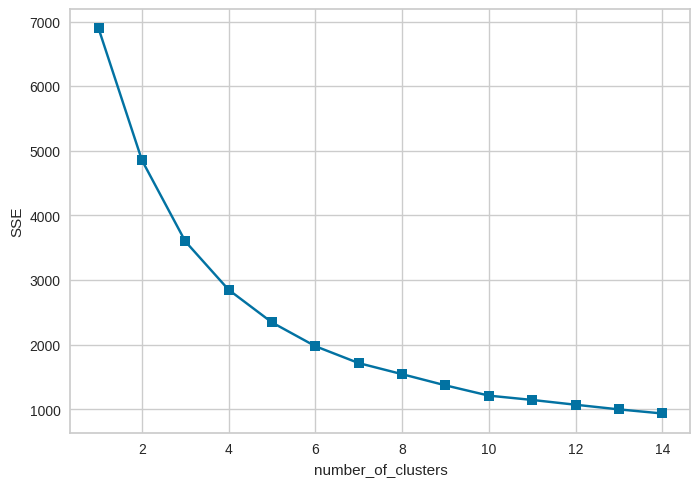

None


In [ ]:
print(NumCl(X_norm))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

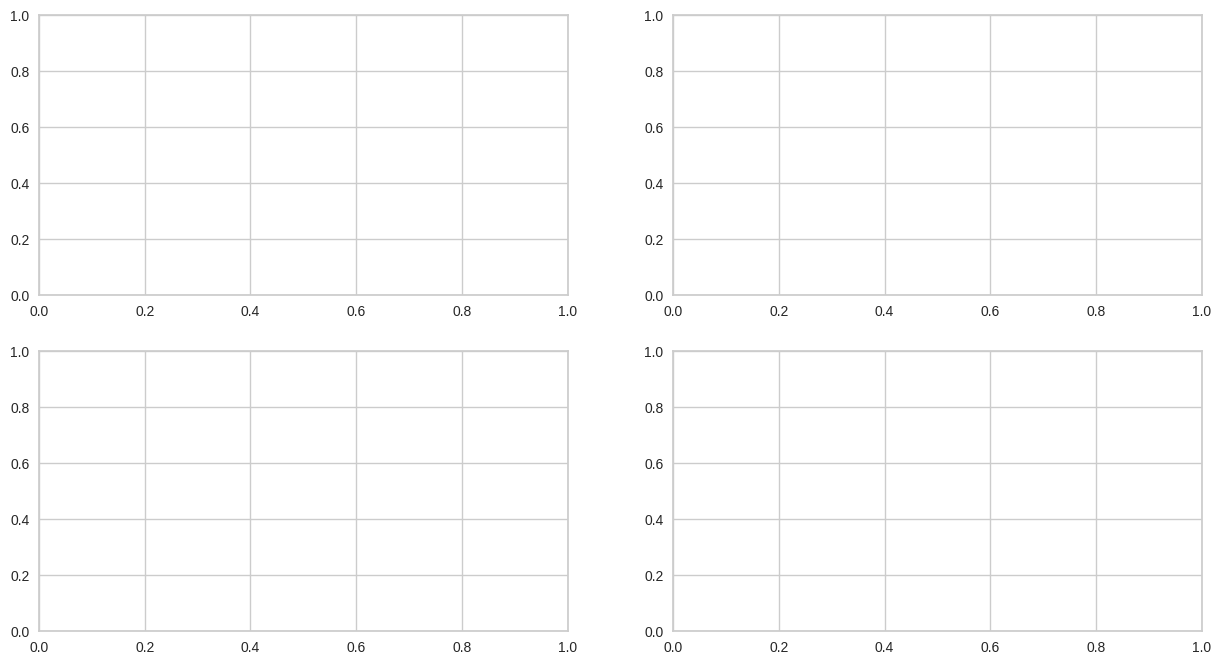

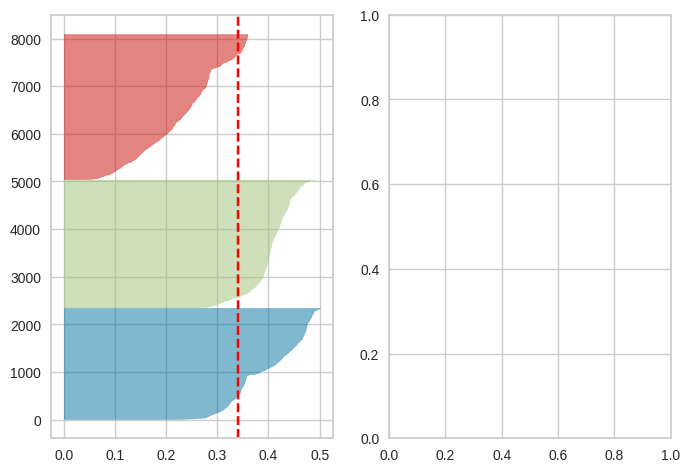

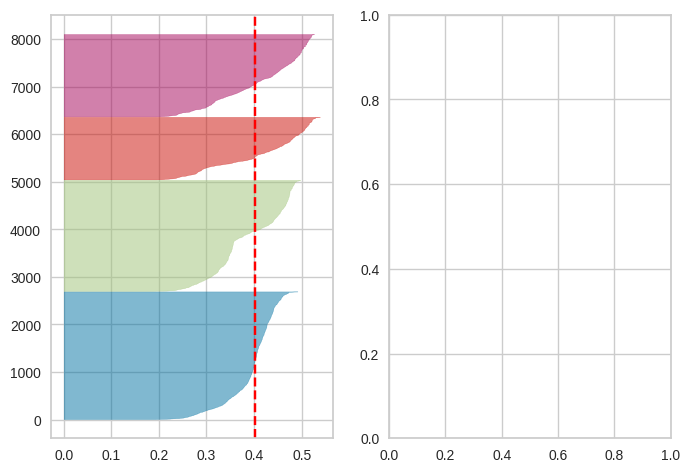

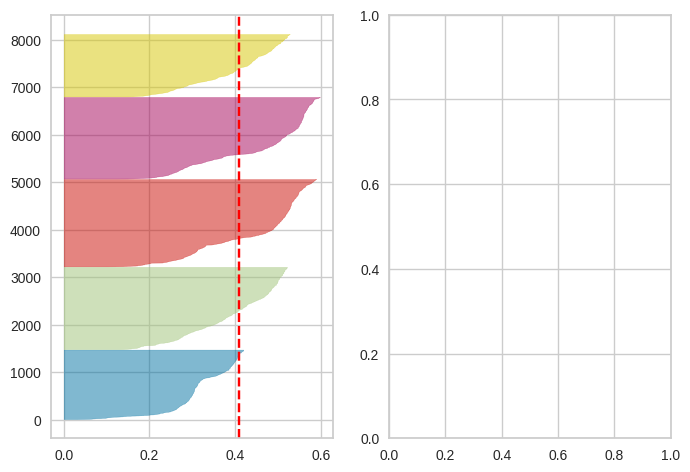

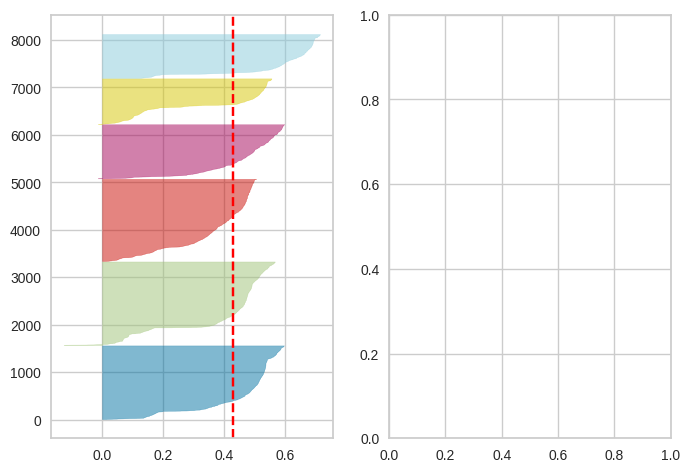

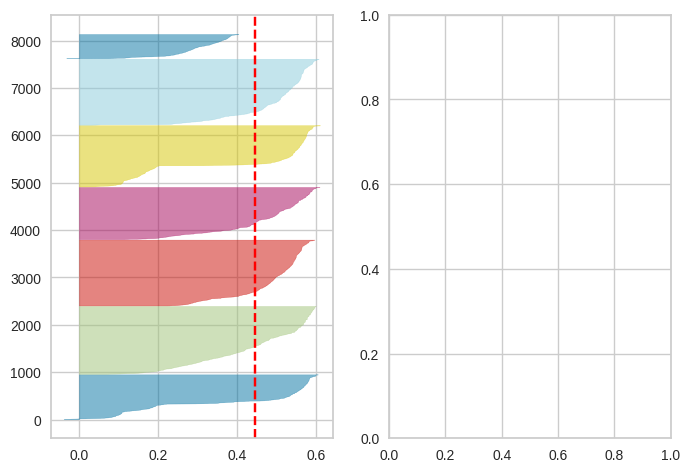

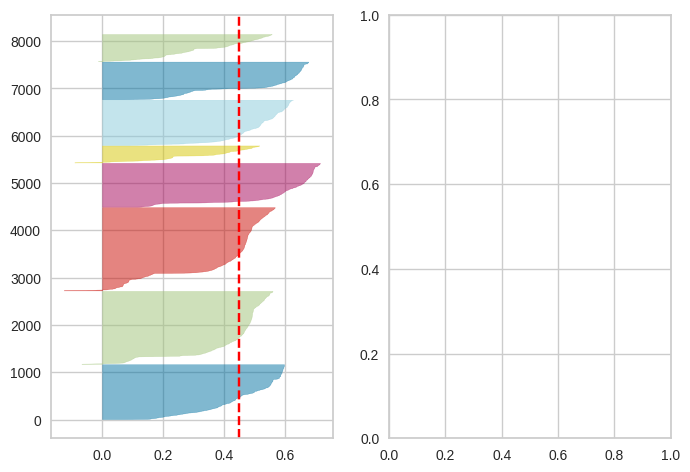

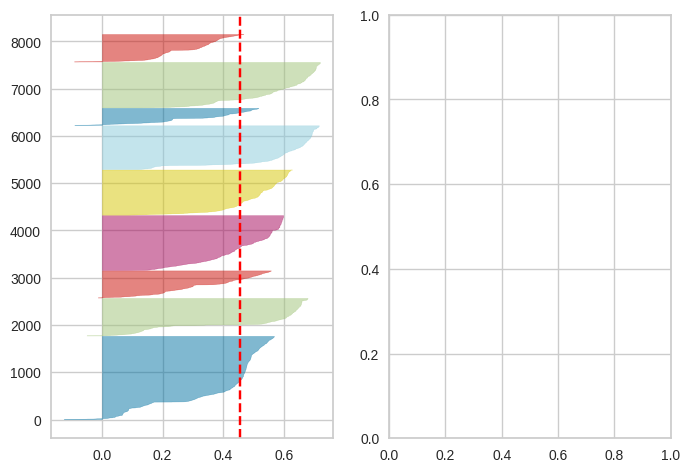

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i in range(3, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    km = KMeans(n_clusters=i, random_state = 42)

    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax1)
    visualizer.fit(X_norm)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.5, min_samples = 5).fit(X_norm)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 1


Увидим, что все три метода показали оптимальное количество класетеров = 4

# Деление на кластеры

In [ ]:
def Format(x):
  n = []
  for i in range(len(x)):
    if not(x[i] in n):
      n.append(x[i])
    x[i] = n.index(x[i]) + 1
  return x

In [ ]:
model = KMeans(n_clusters = 4).fit(X_norm)

f = Format(model.labels_)
ans = pd.DataFrame(id, columns = ['ID'])
ans['Segmentation'] = f
ans.to_csv('customer_res.csv', index = False, sep =',')
ans.head(7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Segmentation
0,462809,1
1,462643,2
2,466315,2
3,461735,3
4,462669,2
5,461319,1
6,460156,3


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters = 4,  affinity = 'euclidean', linkage = 'ward').fit(X_norm)
y_pred = clustering.labels_

f = Format(y_pred)
ans = pd.DataFrame(id, columns = ['ID'])
ans['Segmentation'] = f
ans.to_csv('customer_res1.csv', index = False, sep =',')
ans.head(7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,ID,Segmentation
0,462809,1
1,462643,2
2,466315,2
3,461735,3
4,462669,2
5,461319,1
6,460156,3
